In [1]:
# Import Libraries

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2, VGG16, VGG19, ResNet50

import numpy as np
import itertools
import cv2
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Declare Path for Datasets
training_path = 'C:/Users/WIN 10/4th yr/CNN Discussion/train'
testing_path = 'C:/Users/WIN 10/4th yr/CNN Discussion/test'
validation_path = 'C:/Users/WIN 10/4th yr/CNN Discussion/validation/pic'

In [3]:
#retains the same output after iteration
tf.random.set_seed(1210)

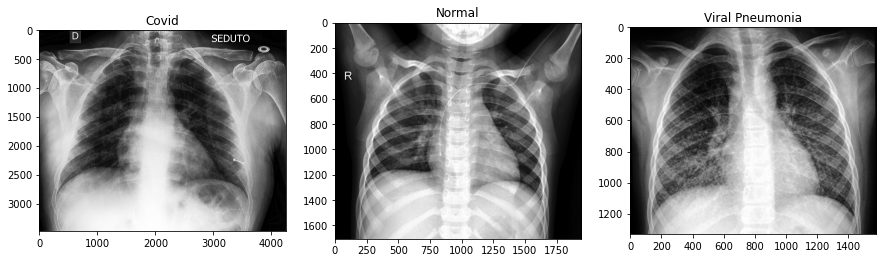

In [4]:
#Preparing the datasets with visualization for Covid, Normal, Viral Pneumonia
plt.figure(figsize = (15, 15))
covid_img = cv2.imread('C:/Users/WIN 10/4th yr/CNN Discussion/train/Covid/01.jpeg')
normal_img = cv2.imread('C:/Users/WIN 10/4th yr/CNN Discussion/train/Normal/01.jpeg')
vp_img = cv2.imread('C:/Users/WIN 10/4th yr/CNN Discussion/train/Viral Pneumonia/01.jpeg')
plt.subplot(1, 3, 1)
plt.imshow(covid_img)
plt.title('Covid')
plt.subplot(1, 3, 2)
plt.imshow(normal_img)
plt.title('Normal')
plt.subplot(1, 3, 3)
plt.imshow(vp_img)
plt.title('Viral Pneumonia')
plt.show()

In [5]:
# number of classes 
dir_list = sorted(os.listdir('C:/Users/WIN 10/4th yr/CNN Discussion/train'))
class_names_1 = [dir_name for dir_name in dir_list]
class_names_1

['Covid', 'Normal', 'Viral Pneumonia']

In [6]:
# Loading the data

img_generator = ImageDataGenerator(
    rescale = 1. / 224, 
    horizontal_flip = True,
    rotation_range = 20,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.1
)
training = img_generator.flow_from_directory(
    training_path,
    target_size = (224,224),
    color_mode = 'rgb',
    classes = class_names_1,
    batch_size =10,
    class_mode = 'categorical',
    subset = 'training'
)
validation = img_generator.flow_from_directory(
    validation_path,
    target_size = (224,224),
    color_mode = 'rgb',
    classes = class_names_1,
    batch_size =10,
    class_mode = 'categorical',
    subset = 'validation'
)
test_generator = ImageDataGenerator(
    rescale = 1. / 224
)
testing = test_generator.flow_from_directory(
    testing_path,
    target_size = (224,224),
    color_mode = 'rgb',
    classes = class_names_1,
    batch_size =10,
    class_mode = 'categorical',
    shuffle = False

)

Found 225 images belonging to 3 classes.
Found 0 images belonging to 3 classes.
Found 65 images belonging to 3 classes.


In [7]:
base_model = ResNet50(input_shape=(224, 224, 3),
                      include_top=False,
                      weights="imagenet")
base2_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights="imagenet")
base3_model = VGG19(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False
base2_model.trainable = False
base3_model.trainable = True


In [8]:
len(base3_model.layers)

22

In [9]:
fine_tune = 20
for layer in base_model.layers[:fine_tune]:
    layer.trainable = False

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=3, activation='softmax')
    ])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 3)                 6

In [11]:
#Modelling Compile
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
    loss = 'categorical_crossentropy',
    metrics = 'accuracy')
batch_size=10

In [12]:
#Fitting the model

history = model.fit(
    x = training, steps_per_epoch=training.samples // batch_size, epochs=24, 
    validation_data=testing, 
    validation_steps=testing.samples // batch_size,verbose=2)

Epoch 1/24
22/22 - 7s - loss: 0.9572 - accuracy: 0.5767 - val_loss: 0.7209 - val_accuracy: 0.6500 - 7s/epoch - 326ms/step
Epoch 2/24
22/22 - 7s - loss: 0.5588 - accuracy: 0.8233 - val_loss: 0.5928 - val_accuracy: 0.7333 - 7s/epoch - 308ms/step
Epoch 3/24
22/22 - 7s - loss: 0.3845 - accuracy: 0.8512 - val_loss: 0.4953 - val_accuracy: 0.7500 - 7s/epoch - 318ms/step
Epoch 4/24
22/22 - 7s - loss: 0.2770 - accuracy: 0.9163 - val_loss: 0.5098 - val_accuracy: 0.7833 - 7s/epoch - 323ms/step
Epoch 5/24
22/22 - 7s - loss: 0.2270 - accuracy: 0.9116 - val_loss: 0.5398 - val_accuracy: 0.7500 - 7s/epoch - 318ms/step
Epoch 6/24
22/22 - 7s - loss: 0.2530 - accuracy: 0.9163 - val_loss: 0.4867 - val_accuracy: 0.7500 - 7s/epoch - 312ms/step
Epoch 7/24
22/22 - 7s - loss: 0.2489 - accuracy: 0.9023 - val_loss: 0.3575 - val_accuracy: 0.8333 - 7s/epoch - 312ms/step
Epoch 8/24
22/22 - 7s - loss: 0.1908 - accuracy: 0.9209 - val_loss: 0.3667 - val_accuracy: 0.8833 - 7s/epoch - 316ms/step
Epoch 9/24
22/22 - 7s - 

In [13]:
#Print of the train and test accuracy
accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print("The training accuracy is: ", accuracy*100)
print("The testing accuracy is: ", val_accuracy*100)

The training accuracy is:  95.34883499145508
The testing accuracy is:  96.66666388511658


In [15]:
y_hat = model.predict(testing)

7/7 [==============================] - 1s 82ms/step


In [16]:
y_hat_lst = []
for idx in range(y_hat.shape[0]):
    y_hat_lst.append(np.argmax(y_hat[idx]))

In [18]:
y_hat_cat = []
for val in y_hat_lst:
    y_hat_cat.append(class_names_1[val])

In [20]:
true_y_cat = []
for val in testing.classes:
    true_y_cat.append(class_names_1[val])

In [21]:
for i, j in zip(true_y_cat, y_hat_cat):
    print(i, '|', j)

Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Viral Pneumonia
Covid | Viral Pneumonia
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Covid | Covid
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Normal | Normal
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Viral Pneumonia | Viral Pneumonia
Vira

In [22]:
# Give diagnosis for validation folder 

image1 = 'C:/Users/WIN 10/4th yr/CNN Discussion/validation/pic1.jpeg'
image2 = 'C:/Users/WIN 10/4th yr/CNN Discussion/validation/pic2.jpeg'
image3 = 'C:/Users/WIN 10/4th yr/CNN Discussion/validation/pic3.jpeg'
image4 = 'C:/Users/WIN 10/4th yr/CNN Discussion/validation/pic4.jpeg'
image5 = 'C:/Users/WIN 10/4th yr/CNN Discussion/validation/pic5.jpeg'
image6 = 'C:/Users/WIN 10/4th yr/CNN Discussion/validation/pic6.jpeg'
image7 = 'C:/Users/WIN 10/4th yr/CNN Discussion/validation/pic7.jpg'
image8 = 'C:/Users/WIN 10/4th yr/CNN Discussion/validation/pic8.jpeg'
image9 = 'C:/Users/WIN 10/4th yr/CNN Discussion/validation/pic9.jpeg'
image10 = 'C:/Users/WIN 10/4th yr/CNN Discussion/validation/pic10.jpeg'
merged = [image1,image2,image3,image4,image5,image6,image7,image8,image9,image10]

In [24]:
for image1 in merged:
    img = keras.preprocessing.image.load_img(
        image1, target_size = (224,224))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) #Creating of data abtch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print("This is most likely to be {}"
    .format(class_names_1[np.argmax(score)], 100* np.max(score)))

1/1 [==============================] - 0s 17ms/step
This is most likely to be Normal
1/1 [==============================] - 0s 18ms/step
This is most likely to be Covid
1/1 [==============================] - 0s 18ms/step
This is most likely to be Viral Pneumonia
1/1 [==============================] - 0s 17ms/step
This is most likely to be Viral Pneumonia
1/1 [==============================] - 0s 17ms/step
This is most likely to be Normal
1/1 [==============================] - 0s 18ms/step
This is most likely to be Covid
1/1 [==============================] - 0s 17ms/step
This is most likely to be Covid
1/1 [==============================] - 0s 17ms/step
This is most likely to be Viral Pneumonia
1/1 [==============================] - 0s 17ms/step
This is most likely to be Covid
1/1 [==============================] - 0s 17ms/step
This is most likely to be Normal
